-----

-----

# Proyecto Sprint 6


## Inicialización
### Cargar las librerías

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Cargar los datos

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()
print()
print(games.head(10))
print()
print(games.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info`, `head` y `sample` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Preparar los datos

**Se van a realizar los siguientes pasos para darle el formato correcto a los datos y prepararlos para su posterior utilización:**

Corregir los nombres de las columnas (snake_case)

Convertir los datos que estén en un tipo incorrecto a un tipo de dato que se pueda utilizar mejor

Tratar los valores ausentes

Calcular las ventas totales para cada juego y colocar los valores en una columna separada.


In [3]:
#Reemplazar los nombres de las columnas por snake_case
games.columns = games.columns.str.strip().str.lower().str.replace(' ', '_')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fabricio excelente trabajo ajustando los nombres de las columnas, esto facilitará el análisis de los datos

</div>

**Antes de cambiar los tipos de datos es importante sustituir los datos no nulos, para poder utilizar la columna con fines estadísticos**

**Para las columnas con datos cualitativos/descriptivos, sustituiré los valores no nulos como Unknown para poder trabajarlos**




In [4]:
print(games.isna().sum())
print()
print(games[games['name'].isna()])
#Los name y genre que se encuentran como NaN se sustiuirán por Unknown, ya que,
#en las demás columnas contienen datos que pueden ser relevantes para las estadísticas más adelante
print(games['genre'].unique())
print(games['platform'].unique())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [5]:
#Eliminamos los NaN de name y genre
games['name'] = games['name'].fillna('unknown')
games['name'] = games['name'].str.strip().str.lower()
games['genre'] = games['genre'].fillna('unknown')
games['genre'] = games['genre'].str.strip().str.lower()
print(games['genre'].unique())
print(games[games['name'].isna()])


['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' 'unknown']
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [6]:
print(games[games['year_of_release'].isna()])
print(games['year_of_release'].unique().sum())
#games['year_of_realease'] = games['year_of_release'].fillna('unknown')
#games['year_of_release'] = games['year_of_release'].astype('object')

## Debido a que se va a hacer un análisis estadístico por años, para determinar un plan para el siguiente año
## eliminaré las columnas que no tienen año, ya que no apartarán nada al análisis estadístico
games = games.dropna(subset = ['year_of_release']).reset_index(drop = True)
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()


                                    name platform  year_of_release  \
183                      madden nfl 2004      PS2              NaN   
377                     fifa soccer 2004      PS2              NaN   
456           lego batman: the videogame      Wii              NaN   
475           wwe smackdown vs. raw 2006      PS2              NaN   
609                       space invaders     2600              NaN   
...                                  ...      ...              ...   
16373  pdc world championship darts 2008      PSP              NaN   
16405                      freaky flyers       GC              NaN   
16448                          inversion       PC              NaN   
16458        hakuouki: shinsengumi kitan      PS3              NaN   
16522                       virtua quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          sports      4.26      0.26      0.01         0.71          94.0   

In [7]:
#Ya que modificamos un poco los datos, hay que revisar los duplicados
print(games.duplicated().value_counts())


False    16446
dtype: int64


In [8]:
#Para los datos que faltan en los scores y rating vamos a revisar los datos y ver si podemos llegar a una conclusión
#que nos facilite su tratamiento
print(games[games['critic_score'].isna()])
print(games[games['user_score'].isna()])
print(games[games['rating'].isna()])
print(games.isna().sum())



                                name platform  year_of_release         genre  \
1                  super mario bros.      NES             1985      platform   
4           pokemon red/pokemon blue       GB             1996  role-playing   
5                             tetris       GB             1989        puzzle   
9                          duck hunt      NES             1984       shooter   
10                        nintendogs       DS             2005    simulation   
...                              ...      ...              ...           ...   
16441  samurai warriors: sanada maru      PS3             2016        action   
16442               lma manager 2007     X360             2006        sports   
16443        haitaka no psychedelica      PSV             2016     adventure   
16444               spirits & spells      GBA             2003      platform   
16445            winning post 8 2016      PSV             2016    simulation   

       na_sales  eu_sales  jp_sales  ot

In [9]:
## Para el rating, ya que este es un categórico se van a rellenar los datos con unknown
## Los score se van a dejar como NaN para que al momento de utilizar las funciones de pandas para estadísticas 
## y matplotlib sean ignorados
# los TBD de la columna user_score se convertiran a NaN para su utilización antes mencionada

games['rating'] = games['rating'].fillna('unknown')
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Con respecto al manejo de datos faltantes, las estrategias que planteas son válidas para el contexto del caso de estudio; no obstante, acá te comparto un artículo donde hablan sobre diferentes [métodos de manejo de datos faltanes](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) que seguro te serán útiles en futuros proyectos.

</div>

Es probable que los juegos que tienen NaN en sus scores, no fueron clasificados o no se obtuvieron esos datos

**De igual manera, creo que lo mejor para el tratamiento de los datos es separar el Dataframe en dos slices, uno que sea de ventas y otro de score/ratings**

Por lo que separaremos en games_sales y games_scores

In [10]:
games_sales = games[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
games_scores = games[['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']]

In [11]:
games_sales['total_sales'] = (games_sales['na_sales'] + games_sales['eu_sales'] + games_sales['jp_sales'] + games_sales['other_sales'])
games_sales.info()
print()
print(games_sales.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   total_sales      16446 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB

                                         name platform  year_of_release  \
9388                 deception iv: blood ties      PSV             2014   
1652                                boom blox      Wii             2008   
6033                              deathsmiles     X360             2009   
3370    harvest moon: f

/tmp/ipykernel_82/3514819453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_sales['total_sales'] = (games_sales['na_sales'] + games_sales['eu_sales'] + games_sales['jp_sales'] + games_sales['other_sales'])


## Analizar los datos

### ¿Cuántos juegos fueron lanzados en diferentes años? ¿Son significativos los datos de cada período?

In [12]:
games_by_year = games['year_of_release'].value_counts().sort_index()
print(games_by_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


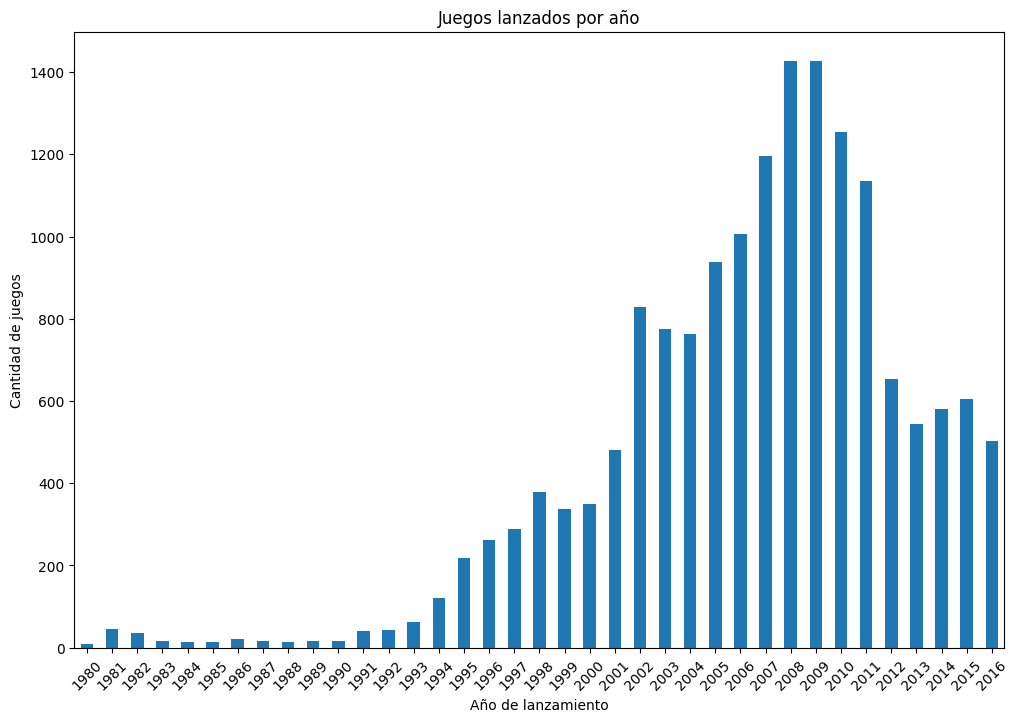

In [13]:
games_by_year.plot(kind = 'bar',
                   figsize = (12, 8),
                   title = 'Juegos lanzados por año',
                   xlabel = 'Año de lanzamiento',
                   ylabel = 'Cantidad de juegos',
                   rot = 45,
                  )
plt.show()

Los datos más consistentes y representativos se encuentran a partir del año 2000, por lo que es razonable enfocar el análisis en ese período y considerar descartar los años anteriores si se busca estabilidad y volumen de datos suficientes.

In [14]:
games_from2000 = games[games['year_of_release'] > 2000].reset_index(drop = True)
#Aquí almacenamos en data frame solo los datos de los juegos a partir de los 2000 que podemos utilizar después


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo! La gráfica muestra un crecimiento hasta 2008-2009, seguido de una caída en lanzamientos. Esto podría deberse al éxito de consolas como PS3 y Xbox 360, y luego a cambios en la industria: más enfoque en calidad, auge de juegos móviles, distribución digital o la crisis de 2008.

</div>

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Para resolver estas preguntas realizaré lo siguiente:

    Calcular las ventas totales por plataforma

    Seleccionar las plataformas con más ventas totales

    Visualizar su evolución a lo largo del tiempo

    Detectar cuándo aparecen y desaparecen

In [15]:
sales_by_platform = games_sales.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(sales_by_platform.head(10))
top_platforms = sales_by_platform.head(10).index.tolist()
print(top_platforms)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


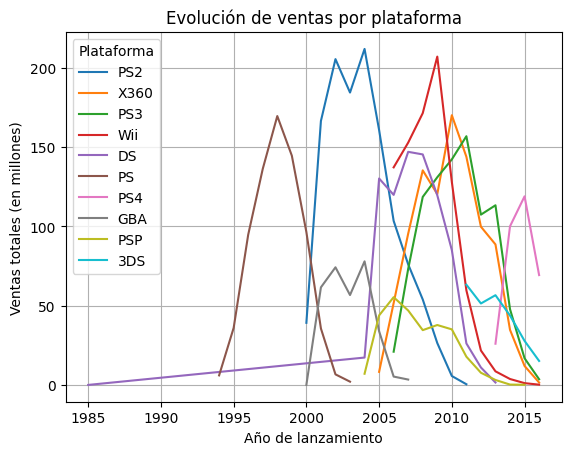

In [16]:
#Creamos un gráfico con los datos de cada plataforma de las Top 10 plataformas con más ventas
#En este mismo gráfico observamos cuando aparecen y desaparecen las plataformas y sus picos de ventas
for platform in top_platforms:
    subset = games_sales[games_sales['platform'] == platform]
    yearly_sales = subset.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.title('Evolución de ventas por plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
#plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Perfecto Fabricio, el gráfico confirma que cada generación de consolas tiene un ciclo de vida (aproximadamente 5 años) con un período de auge y una posterior caída, lo que sugiere que el éxito de un videojuego está fuertemente vinculado al momento en el que es lanzado dentro de ese ciclo. 

</div>

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Para responder esta pregunta hay que revisar cuáles son las plataformas que siguen activas, de por ejemplo los últimos 3 años (2015, 2014 y 2013), tomando en cuenta que el 2016 tiene pocos datos, es posible que este año aún no tenga la información completa


In [17]:
#Para esto creamos un DF que solo tenga los datos de 2013 a 2015
games_model_sales = games_sales[(games_sales['year_of_release'] >= 2013) & (games_sales['year_of_release'] <=2015)].reset_index(drop = True)
print(games_model_sales.head())

#Dado que separé los datos de ventas y scores, hago lo mismo para el DF de scores
games_model_scores = games_scores[(games_scores['year_of_release'] >= 2013) & (games_scores['year_of_release'] <=2015)].reset_index(drop = True)
print(games_model_scores.head())

                        name platform  year_of_release         genre  \
0         grand theft auto v      PS3             2013        action   
1         grand theft auto v     X360             2013        action   
2  call of duty: black ops 3      PS4             2015       shooter   
3        pokemon x/pokemon y      3DS             2013  role-playing   
4         grand theft auto v      PS4             2014        action   

   na_sales  eu_sales  jp_sales  other_sales  total_sales  
0      7.02      9.09      0.98         3.96        21.05  
1      9.66      5.14      0.06         1.41        16.27  
2      6.03      5.86      0.36         2.38        14.63  
3      5.28      4.19      4.35         0.78        14.60  
4      3.96      6.31      0.38         1.97        12.62  
                        name platform  year_of_release         genre  \
0         grand theft auto v      PS3             2013        action   
1         grand theft auto v     X360             2013        a

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [18]:
#Para tener los datos aún más claros, vuelvo a sacar el Top 10 plataformas de ventas
top_sales_plat_model = games_model_sales.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(top_sales_plat_model.head(10))



platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
WiiU     60.03
PC       34.18
PSV      28.74
Wii      13.48
PSP       3.50
Name: total_sales, dtype: float64


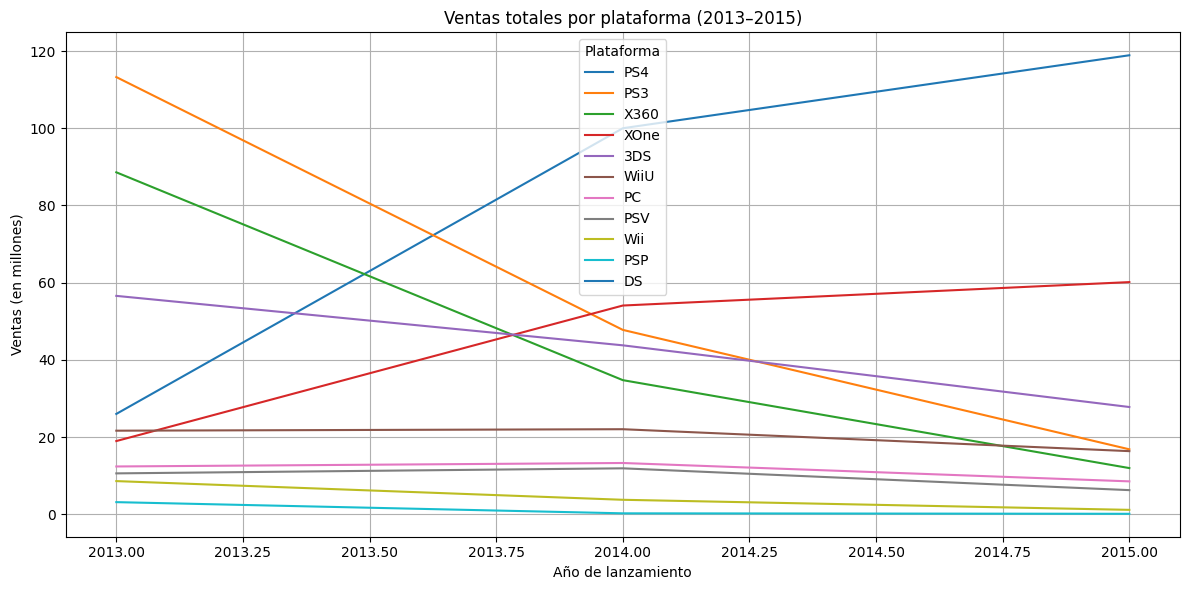

In [19]:
#De nuevo se hace la gráfica conforme a los años de solo los 3 años seleccionados anteriormente
plt.figure(figsize=(12, 6))
for platform in top_sales_plat_model.index:
    data = games_model_sales[games_model_sales['platform'] == platform]
    yearly_sales = data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.title('Ventas totales por plataforma (2013–2015)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas (en millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()

Observamos que las 5 plataformas con ventas son: 

PS4     244.89

PS3     177.83

X360    135.28

XOne    133.17

3DS     128.11

WiiU     60.03

PC       34.18

PSV      28.74

Wii      13.48

PSP       3.50

Y en la gráfica se observa que las 5 plataformas con más ventas en 2015 son PS4, XboxOne, 3DS, PS3 y WiiU

Sin embargo, de esas 5, las únicas 2 que presentan un crecimiento y no un declive son PS4 y XboxOne

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

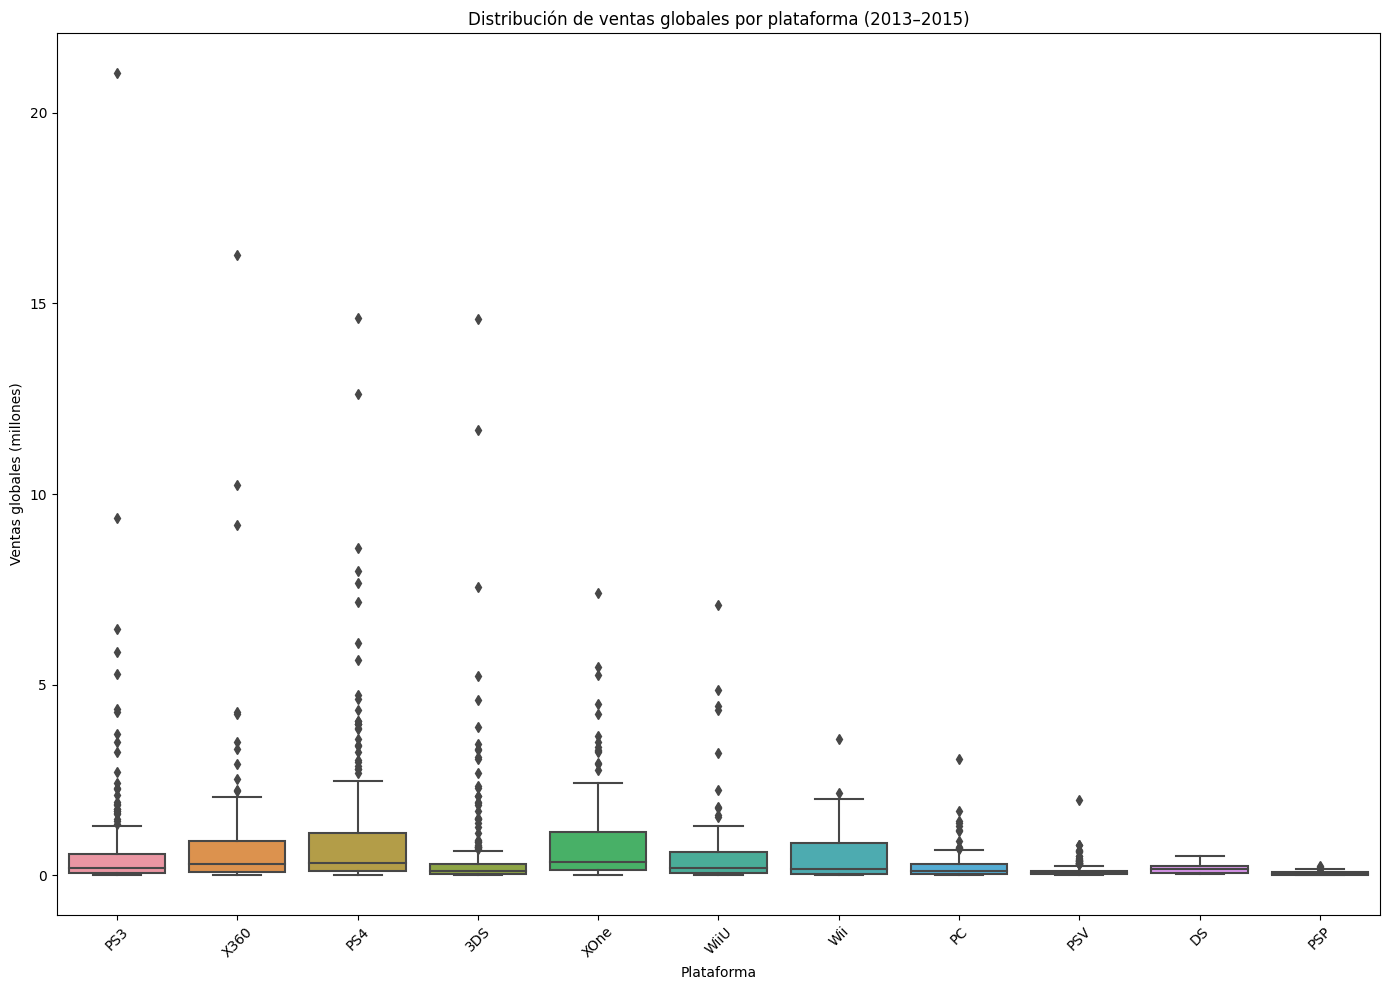

In [20]:
#import seaborn as sns

plt.figure(figsize=(14, 10))
sns.boxplot(data=games_model_sales, x='platform', y='total_sales')

plt.title('Distribución de ventas globales por plataforma (2013–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

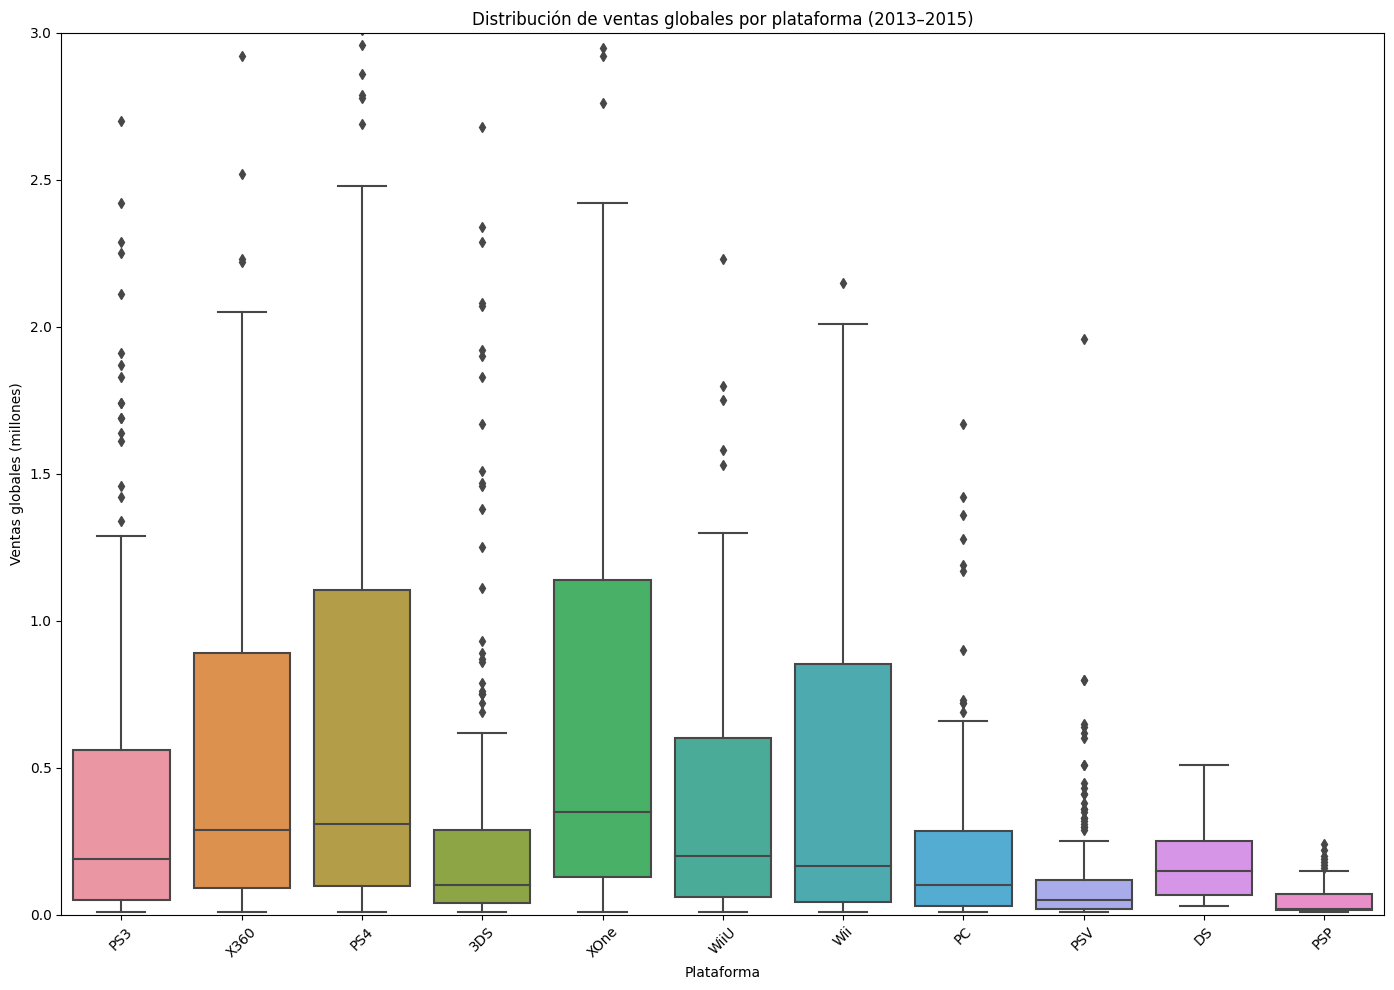

In [21]:
# Recorto el eje y para poder observar mejor los boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(data=games_model_sales, x='platform', y='total_sales')

plt.title('Distribución de ventas globales por plataforma (2013–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 3)
#plt.yscale('log')
plt.show()

Los boxplot muestran que la mayoría de las plataformas tienen una distribución de ventas similar, con mediana por debajo de 0.5 millones de unidades. Sin embargo, algunas lpataformas presentan varios outliers, lo cual sugiere que en esas plataformas algunos juegos alcanzan niveles de ventas significativamente superiores al promedio. La presencia de muchos outliers en PS4 indica que es una plataforma con varios éxitos de ventas destacados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fabricio has hecho una buena lectura de los *boxplots* al identificar patrones comunes en la distribución de ventas entre plataformas, así como destacar aquellos casos particulares donde los outliers revelan comportamientos atípicos pero significativos. Es especialmente acertado cómo interpretas la concentración de outliers en PS4 como un indicio de su capacidad para generar títulos con alto impacto comercial.

</div>

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [22]:
#Elegí PS4 porque es el líder en ventas y en promedio
#Utilizo el DF original "games", por lo que debo agregarle la columna 'total_sales' y volver a filtrar los años 2013 a 2015
games['total_sales'] = games['jp_sales'] + games['eu_sales'] + games['na_sales'] + games['other_sales']
games_model = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <=2015)].reset_index(drop = True)

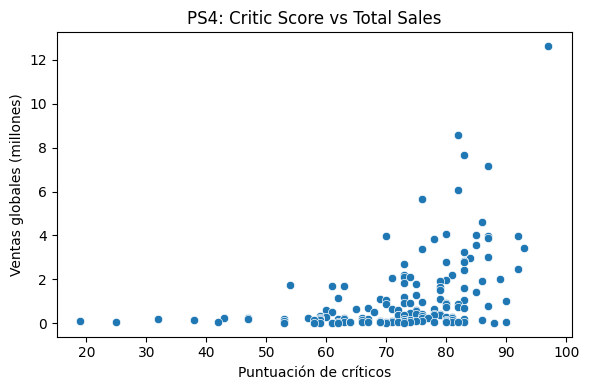

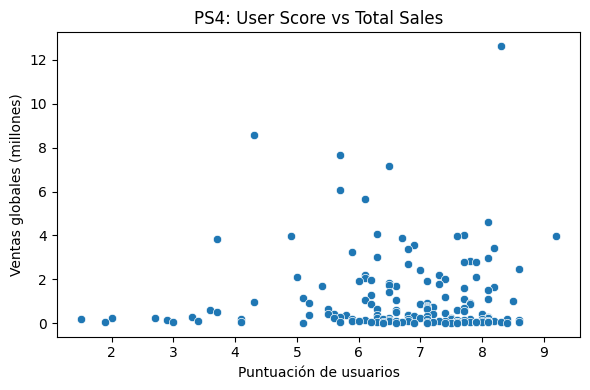

In [23]:


ps4 = games_model[games_model['platform'] == 'PS4']

# Gráfico 1: Crítica profesional
plt.figure(figsize=(6, 4))
sns.scatterplot(data=ps4, x='critic_score', y='total_sales')
plt.title('PS4: Critic Score vs Total Sales')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas globales (millones)')
plt.tight_layout()
plt.show()

# Gráfico 2: Reseñas de usuarios
plt.figure(figsize=(6, 4))
sns.scatterplot(data=ps4, x='user_score', y='total_sales')
plt.title('PS4: User Score vs Total Sales')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas globales (millones)')
plt.tight_layout()
plt.show()

In [24]:
corr_critic = ps4['critic_score'].corr(ps4['total_sales'])
corr_user = ps4['user_score'].corr(ps4['total_sales'])

print(f"Correlación (Críticos vs Ventas): {corr_critic:.3f}")
print(f"Correlación (Usuarios vs Ventas): {corr_user:.3f}")

Correlación (Críticos vs Ventas): 0.432
Correlación (Usuarios vs Ventas): 0.024


Se observa una correlación positiva entre las puntuaciones de críticos y las ventas, lo cual sugiere que una mejor valoración crítica puede estar asociada a mayores ventas.
En cambio, la correlación con las puntuaciones de usuarios es baja o casi nula, lo que puede indicar que el comportamiento del consumidor no siempre coincide con las opiniones de los usuarios en línea.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

### Compara las ventas de los mismos juegos en otras plataformas.

Para responder a esta cuestión se buscan los juegos que se lanzaron en diferentes plataformas y después se comparan

In [25]:
#juegos repetidos
mult_games = games_model_sales['name'].value_counts()
rep_games = mult_games[mult_games > 1].index

multi_platform_games = games_model_sales[games_model_sales['name'].isin(rep_games)]
print(multi_platform_games.head())

                        name platform  year_of_release    genre  na_sales  \
0         grand theft auto v      PS3             2013   action      7.02   
1         grand theft auto v     X360             2013   action      9.66   
2  call of duty: black ops 3      PS4             2015  shooter      6.03   
4         grand theft auto v      PS4             2014   action      3.96   
6       call of duty: ghosts     X360             2013  shooter      6.73   

   eu_sales  jp_sales  other_sales  total_sales  
0      9.09      0.98         3.96        21.05  
1      5.14      0.06         1.41        16.27  
2      5.86      0.36         2.38        14.63  
4      6.31      0.38         1.97        12.62  
6      2.56      0.04         0.91        10.24  


In [26]:
#comparación
comp_sales = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().unstack().fillna(0)
print(comp_sales)

platform                                             3DS   DS   PC   PS3  \
name                                                                       
2014 fifa world cup brazil                          0.00  0.0  0.0  0.61   
3rd super robot wars z jigoku hen                   0.00  0.0  0.0  0.23   
3rd super robot wars z: tengoku-hen                 0.00  0.0  0.0  0.15   
accel world: kasoku no chouten                      0.00  0.0  0.0  0.02   
adventure time: explore the dungeon because i d...  0.14  0.0  0.0  0.04   
...                                                  ...  ...  ...   ...   
yoru no nai kuni                                    0.00  0.0  0.0  0.05   
young justice: legacy                               0.03  0.0  0.0  0.09   
zombie army trilogy                                 0.00  0.0  0.0  0.00   
zoo tycoon (2013)                                   0.00  0.0  0.0  0.00   
zumba fitness: world party                          0.00  0.0  0.0  0.00   

platform   

Siento que solo hacer la comparativa de todos los juegos multiplataforma no sirve de mucho así que ahora filtraré los top 10 juegos de ventas totales y los compararé por plataforma

In [27]:
top10_games = games_model_sales.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10).index
print(top10_games)

Index(['grand theft auto v', 'call of duty: ghosts',
       'call of duty: black ops 3', 'minecraft',
       'call of duty: advanced warfare', 'fifa 15', 'fifa 14', 'fifa 16',
       'pokemon x/pokemon y', 'battlefield 4'],
      dtype='object', name='name')


In [28]:
top10_games_sales = games_model_sales[games_model_sales['name'].isin(top10_games)]
top10_comp = top10_games_sales.groupby(['name', 'platform'])['total_sales'].sum().unstack(fill_value = 0)
print(top10_comp)

platform                          3DS    PC    PS3    PS4   PSP   PSV   Wii  \
name                                                                          
battlefield 4                    0.00  1.36   3.49   3.58  0.00  0.00  0.00   
call of duty: advanced warfare   0.00  0.41   4.36   7.66  0.00  0.00  0.00   
call of duty: black ops 3        0.00  0.26   1.69  14.63  0.00  0.00  0.00   
call of duty: ghosts             0.00  0.69   9.36   3.83  0.00  0.00  0.00   
fifa 14                          0.23  0.40   6.46   3.01  0.19  0.41  0.38   
fifa 15                          0.46  0.29   4.28   6.08  0.00  0.60  0.56   
fifa 16                          0.00  0.20   2.70   8.58  0.00  0.00  0.00   
grand theft auto v               0.00  1.17  21.05  12.62  0.00  0.00  0.00   
minecraft                        0.00  0.00   5.27   4.32  0.00  1.96  0.00   
pokemon x/pokemon y             14.60  0.00   0.00   0.00  0.00  0.00  0.00   

platform                        WiiU   X360  XOne  

Se observa que juegos como Fifa o Call of Duty tienen un gran número de ventas en más de una plataforma

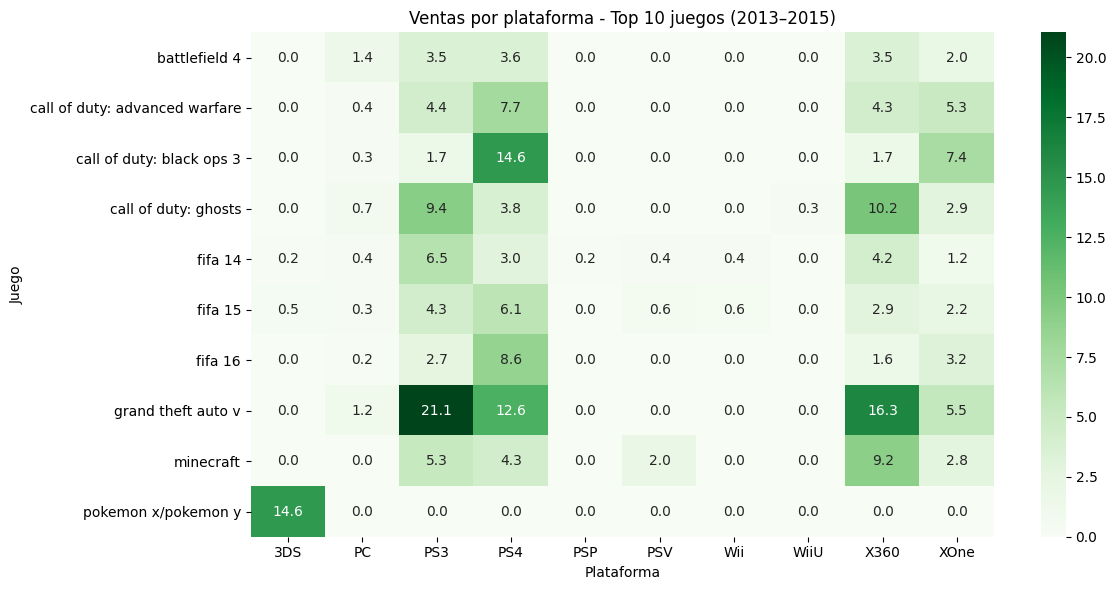

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(top10_comp, annot=True, fmt='.1f', cmap='Greens')
plt.title('Ventas por plataforma - Top 10 juegos (2013–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Juego')
plt.tight_layout()
plt.show()

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

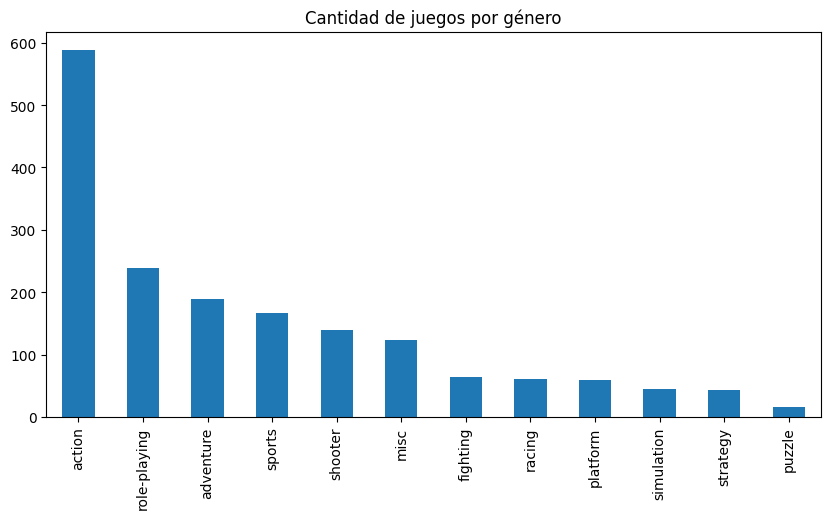

In [30]:
#Para este paso, sigo trabajando solo con los datos de 2013 a 2015 para que sean los datos más cercanos y aproximados a 2016
# para poder predecir un model correcto para 2017
games_model_sales['genre'].value_counts().plot(kind='bar', figsize=(10, 5), title='Cantidad de juegos por género')
plt.show()
#Muestra la cantidad de juegos por género lanzados en esos 3 años

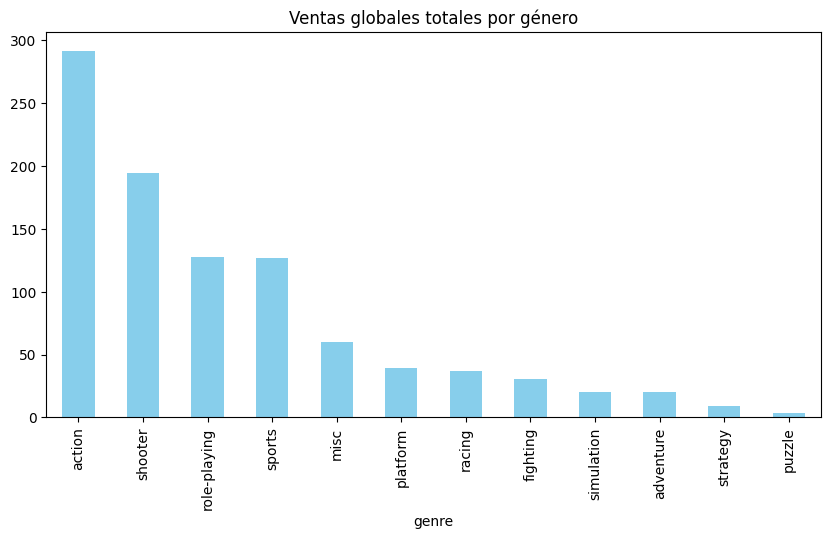

In [31]:
genre_total_sales = games_model_sales.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre_total_sales.plot(kind='bar', figsize=(10, 5), title='Ventas globales totales por género', color='skyblue')
plt.show()

#Muestra las ventas totales por género

Se observa que hay variaciones entre el número de juegos lanzados y las ganancias de cada uno

In [32]:
corr = genre_total_sales.corr(games_model_sales['genre'].value_counts())
#print(corr)
print(f"La correlación entre número de juegos y ventas globales es: {corr:.3f}")

La correlación entre número de juegos y ventas globales es: 0.860


La correlación de el número de juegos lanzados con el número de ventas es alta, lo que indica que cuantos más juegos se lanzan de un género, más se vende este género, lo cual creo que era esperado.

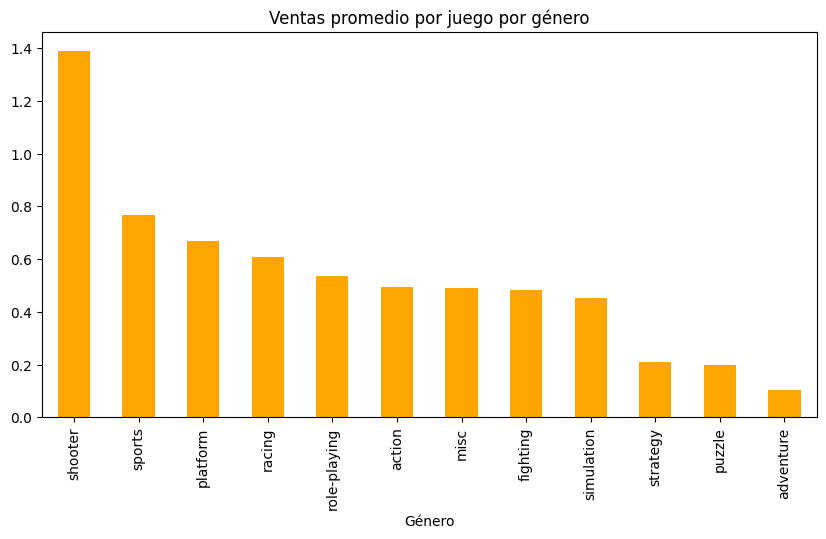

In [33]:
mean_sales_genre = games_model_sales.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

mean_sales_genre.plot(kind='bar', figsize=(10, 5), title='Ventas promedio por juego por género', color='orange', xlabel = 'Género')
plt.show()

Los géneros más lanzados fueron action, role-playing y adventure, sin embargo, no son los que más ventas generan.

Los géneros más comprados fueron action, shooter y role-playing, lo que refleja de mejor manera las preferencias de los compradores.

Géneros cómo sports y platform estacan por su alto promedio de ventas por juego, indicando que aunque pueden tener menos títulos, los que se lanzan suelen vender muy bien.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo! Se ve claramente que los juegos de acción y disparo lideran en ventas. Los géneros de rol y deportes también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

## Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determina:

#### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [34]:
sales_platform = games_model_sales.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
#print(sales_platform.head())
top5_na = sales_platform['na_sales'].sort_values(ascending=False).head(5)
top5_eu = sales_platform['eu_sales'].sort_values(ascending=False).head(5)
top5_jp = sales_platform['jp_sales'].sort_values(ascending=False).head(5)
print(top5_na)
print(top5_eu)
print(top5_jp)

platform
PS4     87.25
X360    80.97
XOne    78.85
PS3     62.83
3DS     34.06
Name: na_sales, dtype: float64
platform
PS4     109.31
PS3      66.55
XOne     41.96
X360     41.81
3DS      28.63
Name: eu_sales, dtype: float64
platform
3DS     59.78
PS3     22.05
PSV     15.03
PS4     10.22
WiiU    10.21
Name: jp_sales, dtype: float64


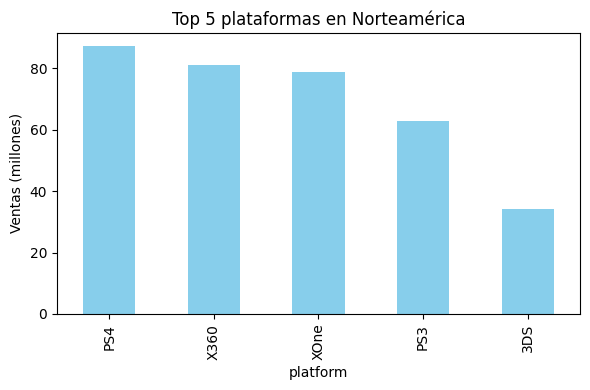

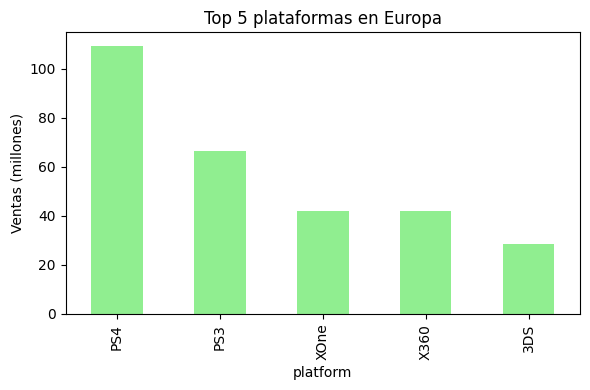

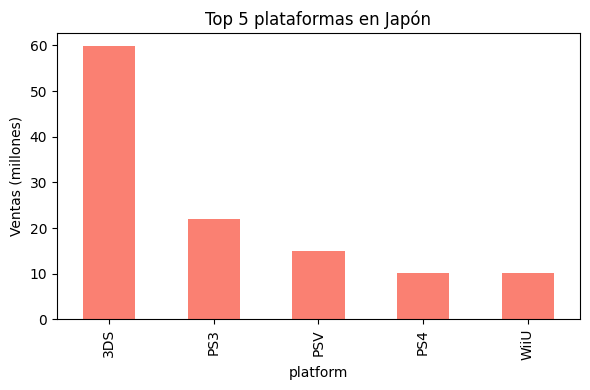

In [35]:
# NA
top5_na.plot(kind='bar', title='Top 5 plataformas en Norteamérica', figsize=(6,4), color='skyblue')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

# EU
top5_eu.plot(kind='bar', title='Top 5 plataformas en Europa', figsize=(6,4), color='lightgreen')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

# JP
top5_jp.plot(kind='bar', title='Top 5 plataformas en Japón', figsize=(6,4), color='salmon')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

En Norteamérica y Europa, Play Station y Xbox dominan claramente el mercado, mientras que en Japón las plataformas portátiles como 3DS tienen una mayor participación.

Lo cual puede ser importante al planificar campañas o lanzamientos regionales.

#### Los cinco géneros principales. Explica la diferencia.

In [36]:
sales_genre = games_model_sales.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print(sales_genre.head())
top5_genre_na = sales_genre['na_sales'].sort_values(ascending=False).head(5)
top5_genre_eu = sales_genre['eu_sales'].sort_values(ascending=False).head(5)
top5_genre_jp = sales_genre['jp_sales'].sort_values(ascending=False).head(5)
print(top5_genre_na)
print(top5_genre_eu)
print(top5_genre_jp)

           na_sales  eu_sales  jp_sales
genre                                  
action       116.76    107.45     33.42
adventure      6.19      6.93      4.64
fighting      13.71      7.21      6.90
misc          26.73     19.38      8.16
platform      16.85     14.19      4.68
genre
action          116.76
shooter          93.50
sports           57.73
role-playing     40.51
misc             26.73
Name: na_sales, dtype: float64
genre
action          107.45
shooter          71.96
sports           48.51
role-playing     32.69
misc             19.38
Name: eu_sales, dtype: float64
genre
role-playing    44.43
action          33.42
misc             8.16
fighting         6.90
shooter          5.55
Name: jp_sales, dtype: float64


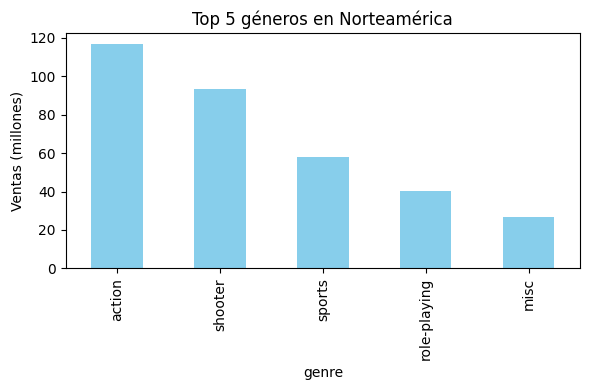

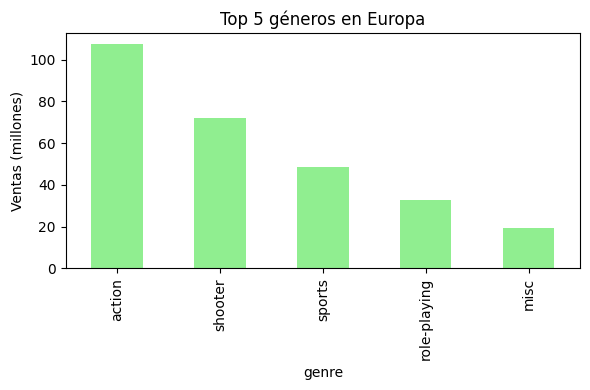

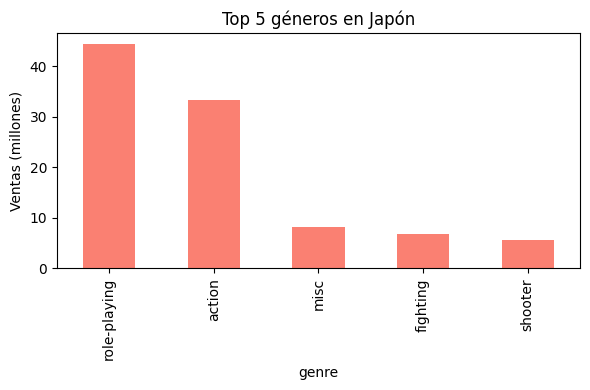

In [37]:
# NA
top5_genre_na.plot(kind='bar', title='Top 5 géneros en Norteamérica', figsize=(6,4), color='skyblue')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

# EU
top5_genre_eu.plot(kind='bar', title='Top 5 géneros en Europa', figsize=(6,4), color='lightgreen')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

# JP
top5_genre_jp.plot(kind='bar', title='Top 5 géneros en Japón', figsize=(6,4), color='salmon')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

En Na y EU se observa el mismo patrón, action, shooter, sports y role-playig en el top4

Mientras que en jp la distribución es diferente, teniendo en el top role-playing, action, misc, fighting y shooter

Esto, considerando el top 5 de plataformas, es un indicador de que tipos de juegos lanzar según la plataforma y la región.

#### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [38]:
sales_by_rating = games_model[games_model['rating'] != 'unknown'] #Para excluir los valores Unknown que antes eran nulos
#Ya que no hay datos de porque no se tenía la info de esos juegos
sales_rating = sales_by_rating.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print(sales_rating)


        na_sales  eu_sales  jp_sales
rating                              
E          71.08     69.75     14.07
E10+       50.43     38.88      5.44
M         149.54    128.78     12.91
T          40.84     32.16     18.32


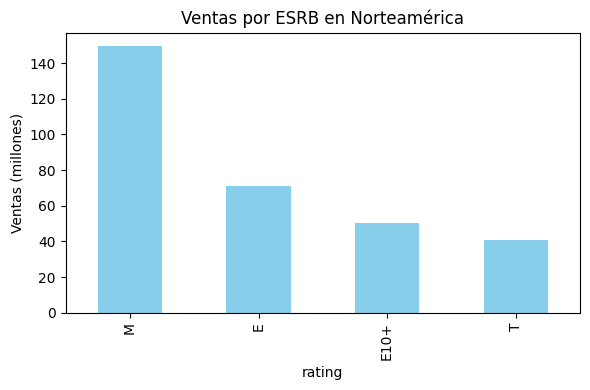

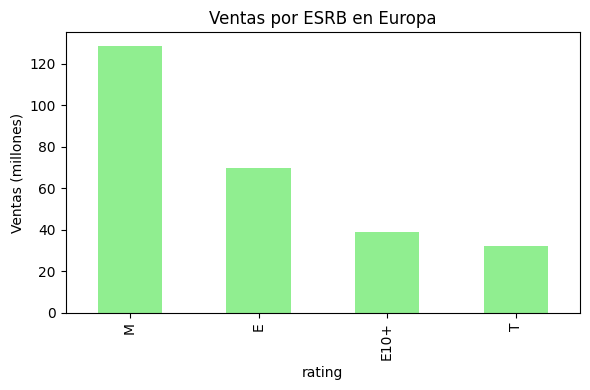

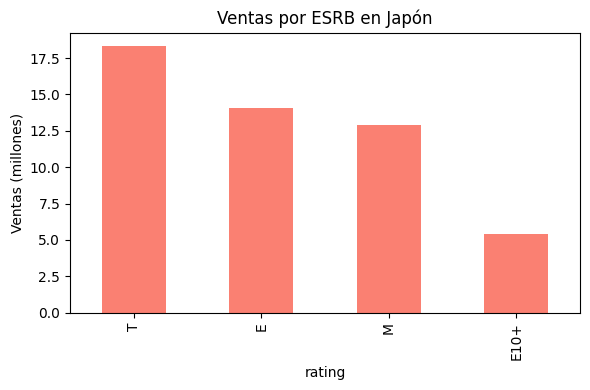

In [39]:
# NA
sales_rating['na_sales'].sort_values(ascending=False).plot(kind='bar', title='Ventas por ESRB en Norteamérica', figsize=(6,4), color='skyblue')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

# EU
sales_rating['eu_sales'].sort_values(ascending=False).plot(kind='bar', title='Ventas por ESRB en Europa', figsize=(6,4), color='lightgreen')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

# JP
sales_rating['jp_sales'].sort_values(ascending=False).plot(kind='bar', title='Ventas por ESRB en Japón', figsize=(6,4), color='salmon')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()

Se observa de nuevo que na y eu son similares, de nuevo japón varía en las preferencias de la clasificación de los juegos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fabricio has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para lograr un análisis comparativo más efectivo, sería beneficioso presentar cada sección de información empleando un único diagrama de barras. Al asignar un color distintivo a cada región, podremos crear una representación visual unificada que facilite la identificación de patrones y diferencias entre las distintas áreas. Esta consolidación de datos no solo optimizará el espacio visual, sino que también permitirá al lector establecer conexiones y comparaciones de manera más intuitiva y directa entre los distintos conjuntos de información. Acá te muestro un ejemplo 

<img src="https://www.analyticslane.com/storage/2022/06/matplotlib-barras-adyacentes.png.webp" width="400">

</div>
</div>

## Prueba las siguientes hipótesis:


### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

H0: Las calificaciones promedio de los usuarios para las plataformas XboxOne y PC son iguales

H1: Las calificaciones promedio de los usuarios para las plataformas XboxOne y PC son diferentes

In [40]:
#print(games_scores.head())
#filtro el DF de scores para XboxOne y PC
xbpc_scores = games_scores[(games_scores['user_score'].notna()) & (games_scores['platform'].isin(['XOne', 'PC']))]
print(xbpc_scores)

#Separo los DF
xb_scores = xbpc_scores[xbpc_scores['platform'] == 'XOne']['user_score']
pc_scores = xbpc_scores[xbpc_scores['platform'] == 'PC']['user_score']

                                    name platform  year_of_release  \
85                            the sims 3       PC             2009   
138                    world of warcraft       PC             2004   
165                   grand theft auto v     XOne             2014   
179       call of duty: advanced warfare     XOne             2014   
191                           diablo iii       PC             2012   
...                                  ...      ...              ...   
16412                            worms 2       PC             1997   
16423  metal gear solid v: ground zeroes       PC             2014   
16427                             breach       PC             2011   
16433            storm: frontline nation       PC             2011   
16436                            15 days       PC             2009   

              genre  critic_score  user_score   rating  
85       simulation          86.0         7.6        T  
138    role-playing          93.0         7.3

In [43]:
t_stat, p_value = ttest_ind(xb_scores, pc_scores, equal_var=False)
print(f"t-stat: {t_stat:.3f}, p-value: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas XboxOne y PC son iguales")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")

t-stat: -4.671, p-value: 0.000
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas XboxOne y PC son iguales


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

H0: Las calificaciones promedio de los usuarios para los géneros acción y deporte son iguales

H1: Las calificaciones promedio de los usuarios para los géneros acción y deporte son diferentes

In [44]:
#filtro el DF de scores para action y sports
act_sp_scores = games_scores[(games_scores['user_score'].notna()) & (games_scores['genre'].isin(['action', 'sports']))]
print(act_sp_scores)

#Separo los DF
act_scores = act_sp_scores[act_sp_scores['genre'] == 'action']['user_score']
sp_scores = act_sp_scores[act_sp_scores['genre'] == 'sports']['user_score']


                                    name platform  year_of_release   genre  \
0                             wii sports      Wii             2006  sports   
3                      wii sports resort      Wii             2009  sports   
13                               wii fit      Wii             2007  sports   
15                          wii fit plus      Wii             2009  sports   
16                    grand theft auto v      PS3             2013  action   
...                                  ...      ...              ...     ...   
16383                    fast racing neo     WiiU             2016  action   
16385                 ben 10 omniverse 2     X360             2013  action   
16391                   prison architect     XOne             2016  action   
16394         e.t. the extra-terrestrial      GBA             2001  action   
16423  metal gear solid v: ground zeroes       PC             2014  action   

       critic_score  user_score   rating  
0              76.0 

In [46]:
t_stat, p_value = ttest_ind(act_scores, sp_scores, equal_var=False)
print(f"t-stat: {t_stat:.3f}, p-value: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula:  Las calificaciones promedio de los usuarios para los géneros acción y deporte son iguales")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")

t-stat: 1.789, p-value: 0.074
No se puede rechazar la hipótesis nula: no hay diferencia significativa.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fabricio aplicaste correctamente las prueba de hipótesis comparando las distribuciones dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto permitirá una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

## Conclusión

El análisis permitió identificar patrones clave en el mercado de videojuegos entre 2013 y 2015, debido a qué los datos del 2016 estaban incompletos y por lo tanto on eran una fuente confiable de datos. Se confirmó que PS4 y XboxOne fueron las plataformas más rentables, y que géneros como Shooter y Sports lideran en ventas globales. Sin embargo, no siempre los géneros más populares son los más rentables por juego.

Las preferencias varían por región: Norteamérica y Europa tienen tendencias similares, mientras que Japón muestra un comportamiento distinto, especialmente en plataformas y géneros. También se comprobó que las reseñas y clasificaciones ESRB influyen en las ventas.

Las pruebas estadísticas demostraron diferencias reales en la valoración de usuarios según plataforma y género, lo que refuerza la necesidad de segmentar el mercado al planificar campañas o lanzar nuevos títulos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión logra sintetizar de manera clara los hallazgos más relevantes del análisis, resaltando no solo las plataformas y géneros más exitosos, sino también las particularidades regionales y la influencia de factores externos como las reseñas y clasificaciones. Es muy valioso cómo logras conectar estos elementos con implicaciones prácticas para la toma de decisiones en el mercado de videojuegos.

</div>